## Downloading the dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
MNIST = fetch_mldata('MNIST original')

In [3]:
MNIST

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [4]:
len(MNIST['data'])

70000

## Visualisation

In [5]:
X,y = MNIST['data'],MNIST['target']

In [6]:
X[69999]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [8]:
y[69999]

9.0

In [9]:
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
_ = X[1000]

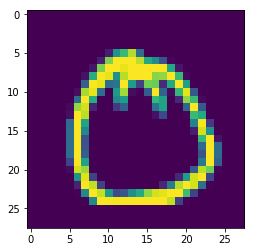

In [16]:
_image = _.reshape(28,28)
plt.imshow(_image)

In [17]:
y[1000]

0.0

# Locating the number 4 and plot the image


In [18]:
type(y)

numpy.ndarray

In [19]:
y == 4

array([False, False, False, ..., False, False, False], dtype=bool)

In [20]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

In [22]:
y[24754]

4.0

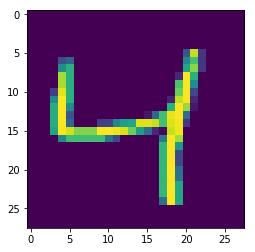

In [23]:
# Follow the same procedure to render 4
_ = X[24754]
_image = _.reshape(28,28)
plt.imshow(_image)

In [24]:
# Split the training set and the test sets
num_splits = 60000
X_train,X_test,y_train,y_test = X[:num_splits],X[num_splits:],y[:num_splits],y[num_splits:]


In [26]:
# Shuffling the dataset since it is not a time series data
import numpy as np
sh_i = np.random.permutation(num_splits)
X_train,y_train = X[sh_i],y[sh_i]

# Training the Binary Classifier

In [29]:
y_train_0 = (y_train == 0)

In [30]:
y_train_0

array([False, False, False, ..., False, False, False], dtype=bool)

In [31]:
y_test_0 = (y_test == 0)

In [32]:
y_test_0

array([ True,  True,  True, ..., False, False, False], dtype=bool)

Stochastic Gradient Descent Classifier

In [33]:
from sklearn.linear_model import SGDClassifier
# Create the classifier object
classifier = SGDClassifier()
# Fit the classifier onto the training set
classifier.fit(X_train,y_train_0)

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [34]:
classifier.predict(X[10000].reshape(1,-1))

array([False], dtype=bool)

# Performance Measures

## Measuring Accuracy Using the Cross-validation

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
classifier = SGDClassifier(random_state=0)


In [36]:
skfolds = StratifiedKFold(n_splits=3,random_state=100)

In [37]:
for tr_i,test_i in skfolds.split(X_train,y_train_0):
    clone_classifier = clone(classifier)
    X_train_fold = X_train[tr_i]
    y_train_folds = (y_train_0[tr_i])
    X_test_fold = X_train[test_i]
    y_test_fold = (y_train_0[test_i])
    
    clone_classifier.fit(X_train_fold,y_train_folds)
    y_pred = clone_classifier.predict(X_test_fold)
    # What are the number of correct precictions ?
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct/len(y_pred)))
    

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9568


C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9884


C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9803


In [38]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier,X_train,y_train_0,cv=3,scoring='accuracy')


C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\l

array([ 0.95680216,  0.9884    ,  0.98034902])

# Confusion Matrix

In [39]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(classifier,X_train,y_train_0,cv=3)

C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Parteek\Anaconda3\l

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_train_0,y_train_pred)

array([[52743,  1334],
       [  155,  5768]], dtype=int64)

In [47]:
# Number of correct predictions = 58511
# Number of incorrect predictions = 1489

In [48]:
from sklearn.metrics import precision_score,recall_score


In [51]:
precision_score(y_train_0,y_train_pred)

0.81216558715854692

In [54]:
5768/(5768+1334)

0.8121655871585469

In [53]:
# Ratio of positive instances correctly identified by the classifier
recall_score(y_train_0,y_train_pred)

0.97383082897180484

In [56]:
5768/(5768+155)

0.9738308289718048

In [57]:
from sklearn.metrics import f1_score
f1_score(y_train_0,y_train_pred)

0.88568138195777346